In [4]:
# Import library yang diperlukan
import pandas as pd         # Untuk manipulasi data
import numpy as np          # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns       # Untuk visualisasi yang lebih interaktif dan menarik
import networkx as nx              # untuk membuat graph (node & edge)

In [5]:
# Load dataset Titanic
titanic = sns.load_dataset('titanic')

# Tampilkan 10 baris pertama
print("10 Baris Pertama Dataset Titanic:")
display(titanic.head(10))

# Info struktur dataset
print("\nInformasi Struktur Dataset:")
titanic.info()

# Statistik deskriptif kolom numerik
print("\nStatistik Deskriptif Kolom Numerik:")
display(titanic.describe().T)   # .T = transpose biar lebih rapi

# Cek missing values
print("\nJumlah Missing Values per Kolom:")
missing_values = titanic.isnull().sum()
display(pd.DataFrame(missing_values, columns=["Missing Values"]))


10 Baris Pertama Dataset Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False



Informasi Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Statistik Deskriptif Kolom Numerik:


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Jumlah Missing Values per Kolom:


,Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


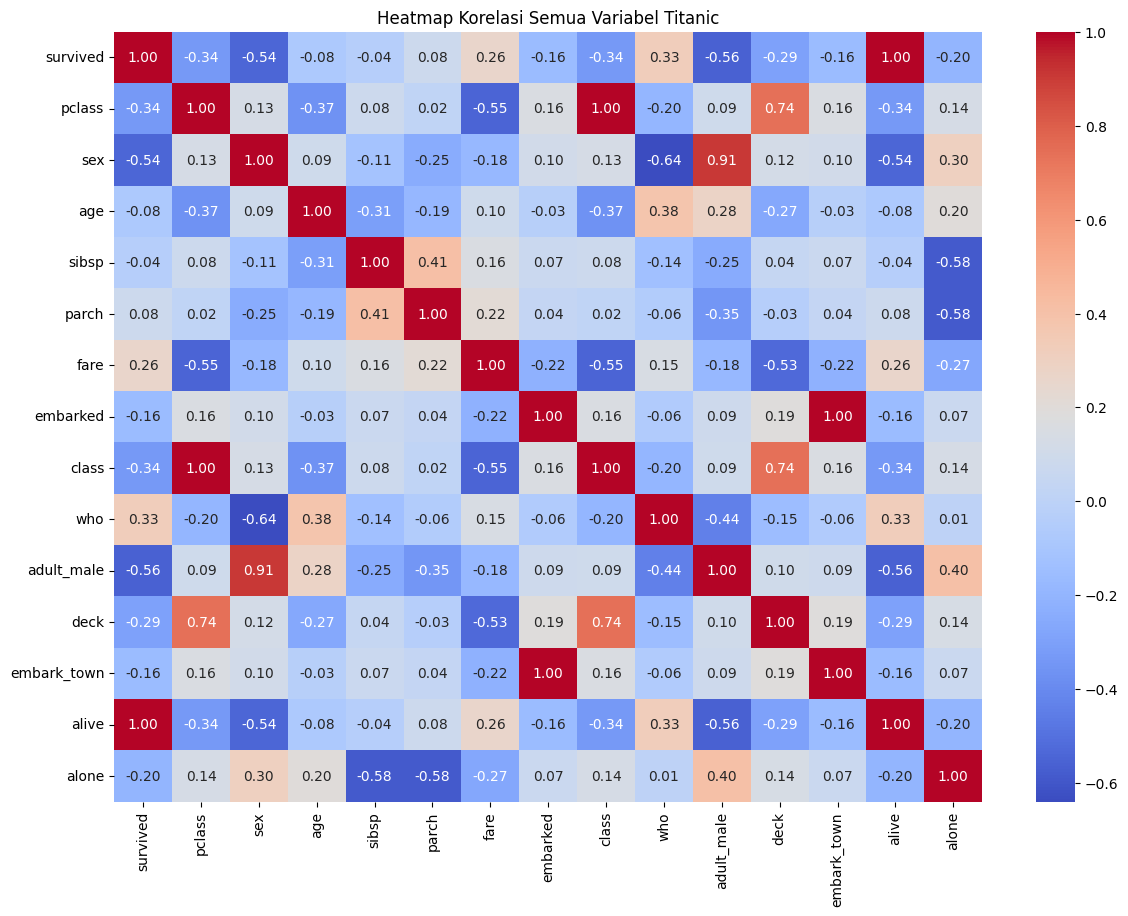

In [7]:
# Encode Semua Variabel
# Salin dataset
encoded_df = titanic.copy()

from sklearn.preprocessing import LabelEncoder

# Encode semua kolom non-numerik menjadi angka
label_enc = LabelEncoder()
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object' or str(encoded_df[col].dtype) == 'category':
        encoded_df[col] = encoded_df[col].astype(str)  # pastikan string
        encoded_df[col] = label_enc.fit_transform(encoded_df[col])

# Hapus kolom yang seluruhnya NaN
encoded_df = encoded_df.dropna(axis=1, how='all')

# Heatmap Korelasi Full Dataset
plt.figure(figsize=(14,10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Semua Variabel Titanic")
plt.show()

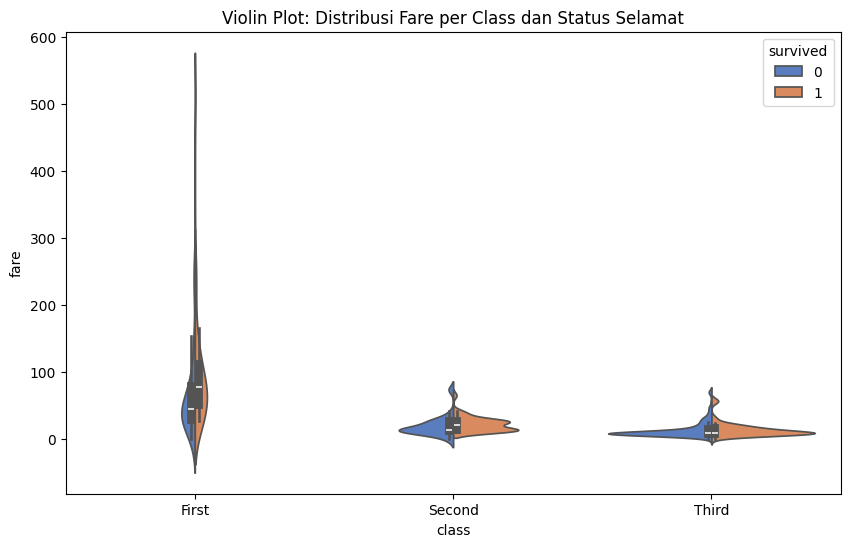

/tmp/ipython-input-558170889.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="age", data=titanic, palette="pastel")


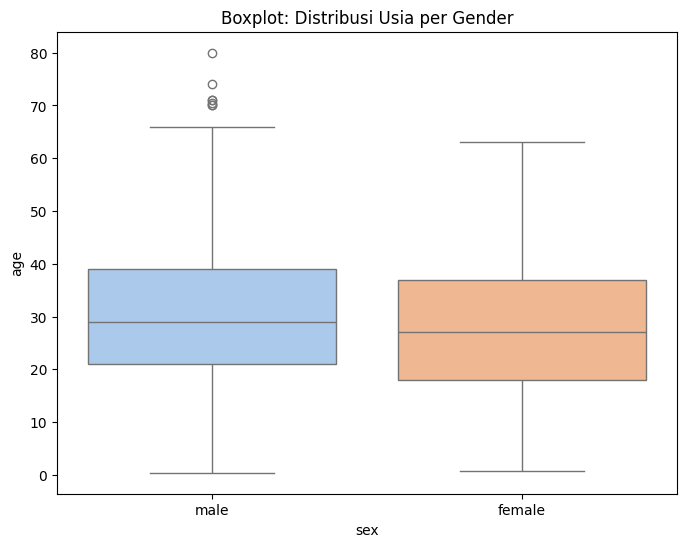

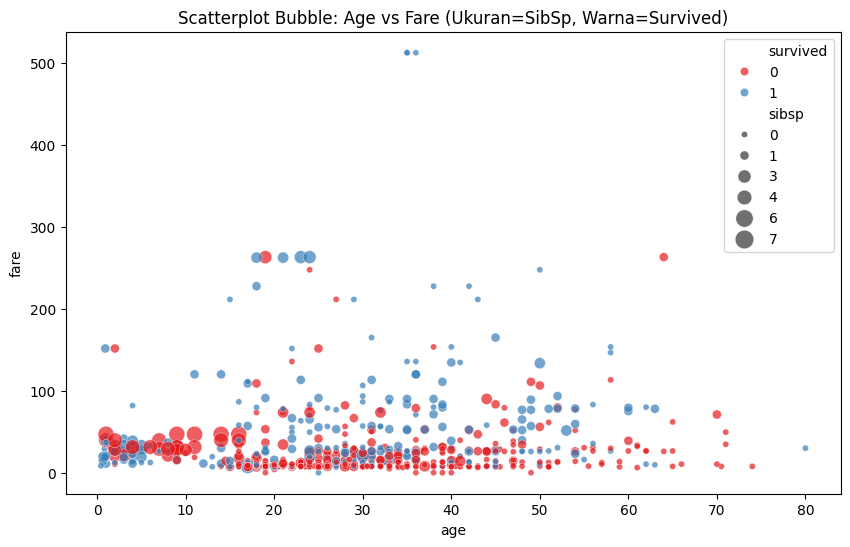

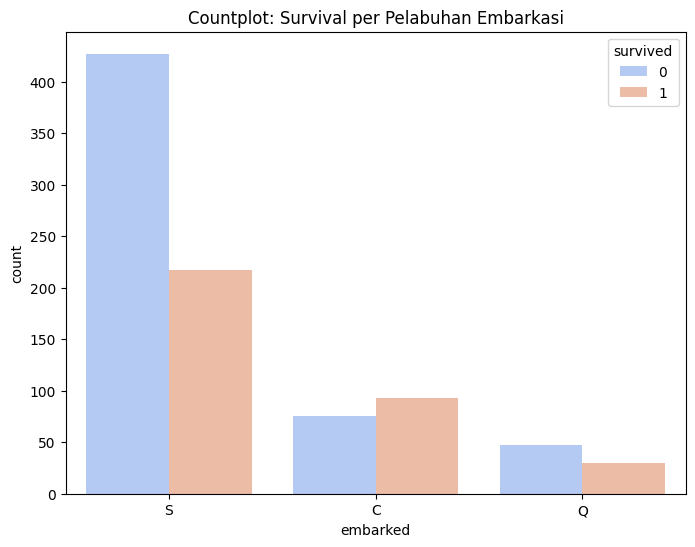

In [8]:
# Violin Plot: Distribusi Fare per Class dan Survival
plt.figure(figsize=(10,6))
sns.violinplot(x="class", y="fare", hue="survived", data=titanic, split=True, palette="muted")
plt.title("Violin Plot: Distribusi Fare per Class dan Status Selamat")
plt.show()

# Boxplot: Usia Penumpang berdasarkan Jenis Kelamin
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="age", data=titanic, palette="pastel")
plt.title("Boxplot: Distribusi Usia per Gender")
plt.show()

# Scatterplot Bubble: Age vs Fare (Ukuran = SibSp, Warna = Survived)
plt.figure(figsize=(10,6))
sns.scatterplot(x="age", y="fare", size="sibsp", hue="survived",
                data=titanic, sizes=(20,200), alpha=0.7, palette="Set1")
plt.title("Scatterplot Bubble: Age vs Fare (Ukuran=SibSp, Warna=Survived)")
plt.show()

# Countplot: Survival berdasarkan Embarked
plt.figure(figsize=(8,6))
sns.countplot(x="embarked", hue="survived", data=titanic, palette="coolwarm")
plt.title("Countplot: Survival per Pelabuhan Embarkasi")
plt.show()


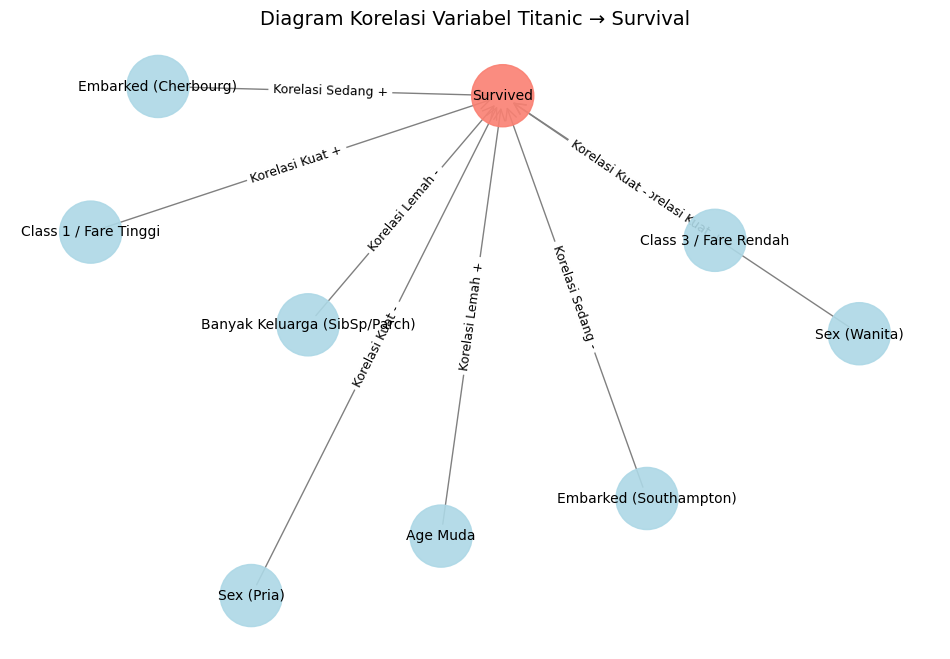

In [11]:
# ===== 1. Buat Graph Kosong (Terarah) =====
G = nx.DiGraph()

# ===== 2. Tambahkan Node Utama (Target) =====
G.add_node("Survived", color="red")

# ===== 3. Tambahkan Variabel & Hubungannya dengan Survival =====
edges = [
    ("Sex (Wanita)", "Survived", "Korelasi Kuat +"),
    ("Sex (Pria)", "Survived", "Korelasi Kuat -"),
    ("Class 1 / Fare Tinggi", "Survived", "Korelasi Kuat +"),
    ("Class 3 / Fare Rendah", "Survived", "Korelasi Kuat -"),
    ("Embarked (Cherbourg)", "Survived", "Korelasi Sedang +"),
    ("Embarked (Southampton)", "Survived", "Korelasi Sedang -"),
    ("Age Muda", "Survived", "Korelasi Lemah +"),
    ("Banyak Keluarga (SibSp/Parch)", "Survived", "Korelasi Lemah -")
]

for source, target, label in edges:
    G.add_edge(source, target, label=label)

# ===== 4. Atur Posisi Node =====
pos = nx.spring_layout(G, seed=42)   # spring_layout: otomatis rapi

# ===== 5. Warna Node (Target merah, variabel lain biru) =====
node_colors = ["salmon" if node == "Survived" else "lightblue" for node in G.nodes()]

# ===== 6. Gambar Diagram =====
plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000, alpha=0.9)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Tambahkan label pada edge (hubungan variabel -> Survived)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# ===== 7. Judul & Tampilkan =====
plt.title("Diagram Korelasi Variabel Titanic → Survival", fontsize=14)
plt.axis("off")
plt.show()